# 决策树

## 3.1.1 信息增益

In [1]:
from math import log

def calShannonEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        label=featVec[-1]
        labelCounts[label]=labelCounts.get(label,0)+1
    shannonEnt=0.0;
    for key in labelCounts:
        p=1.0*labelCounts.get(key)/numEntries
        shannonEnt-=p*log(p,2)
    return shannonEnt

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    featList = ['no surfacing','flippers']
    return dataSet, featList

In [3]:
myDat,featList=createDataSet()

In [4]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
featList

['no surfacing', 'flippers']

In [6]:
calShannonEnt(myDat)

0.9709505944546686

## 3.1.2 划分数据集(决策树分支的对应的数据子集)

In [7]:
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if (featVec[axis]==value):
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [8]:
def chooseBestFeatureToSplit(dataSet):
    numFeature=len(dataSet[0])-1
    baseEnt=calShannonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeature):
        featList=[example[i] for example in dataSet]
        uniqueVals=set(featList)
        conEnt=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/len(dataSet)
            conEnt+=prob*calShannonEnt(subDataSet)
        infoGain=baseEnt-conEnt
        if (infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [9]:
chooseBestFeatureToSplit(myDat)

0

## 3.1.3 递归构建决策树

In [10]:
def majorityClass(classList):
    classcount={}
    for i in classList:
        classcount[i]=classcount.get(i,0)+1
    majorityClass=-1
    for key in classcount:
        classCount=classcount.get(key)
        if(classCount>majorityClass):
            majorityClass=key
    return majorityClass

In [11]:
def createTree(dataSet,featList):
    featList=featList[:]
    classList=[example[-1] for example in dataSet]
    classList=set(classList)
    
    if(len(classList)==1):##如果dataSet中示例都属于同一类别C，则标记为叶节点，返回
        return classList.pop()
    
    if(len(featList)==0):##如果属性集为空，则标记为叶节点，类别标记dataSet中最多的类
        return majorityClass(classList)
    
    bestFeat=chooseBestFeatureToSplit(dataSet)
    bestFeatNames=featList[bestFeat]
    
    myTree={bestFeatNames:{}}
    
    del(featList[bestFeat])
    
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    
    for value in uniqueVals:
        subFeatList=featList[:]
        subDataSet=splitDataSet(dataSet,bestFeat,value)
        if not subDataSet:##如果分支不包含样本，则返回父节点所含样本最多的类别
            return majorityClass(classList)
        else:
            myTree[bestFeatNames][value]=createTree(subDataSet,subFeatList)
        
    return myTree

In [12]:
mytree=createTree(myDat,featList)

In [13]:
mytree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [14]:
featList

['no surfacing', 'flippers']

## 3.2.1 Matplotlib注解

In [15]:
'''
Created on Oct 14, 2010

@author: Peter Harrington
'''
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = myTree.keys()[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

#createPlot(thisTree)

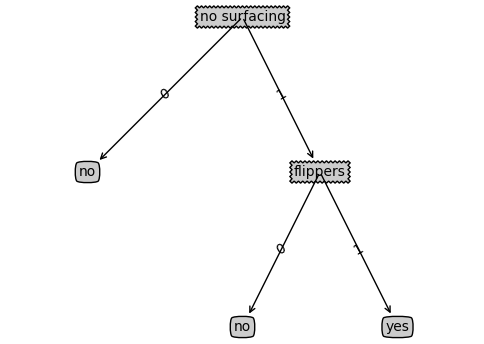

In [16]:
createPlot(mytree)

## 3.3.1 测试算法：使用决策树执行分类

In [19]:
def classify(inputTree,featList,testVec):
    firstStr=inputTree.keys()[0]
    secondDict=inputTree[firstStr]
    featIndex=featList.index(firstStr)
    for key in secondDict:
        if(testVec[featIndex]==key):
            if(type(secondDict[key]).__name__=='dict'):
                classLabel=classify(secondDict[key],featList,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel

In [20]:
classify(mytree,featList,[1,0])

'no'

## 3.3.2 使用算法：决策树的存储

In [25]:
import pickle
def storeTree(inputTree,filename):
    with open(filename,'w') as fw:
        pickle.dump(inputTree,fw)

def grabTree(filename):
    with open(filename) as fr:
        return pickle.load(fr)

In [26]:
storeTree(mytree,'mytree')

In [27]:
mytrees=grabTree('mytree')

In [28]:
mytrees

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 3.4 示例：使用决策树预测隐形眼镜类型

In [36]:
with open('lenses.txt') as fr:
    lenses=[inst.strip().split('\t') for inst in fr.readlines()]

In [40]:
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [38]:
lensesFeatures=['age','prescript','astigmatic','tearRate']

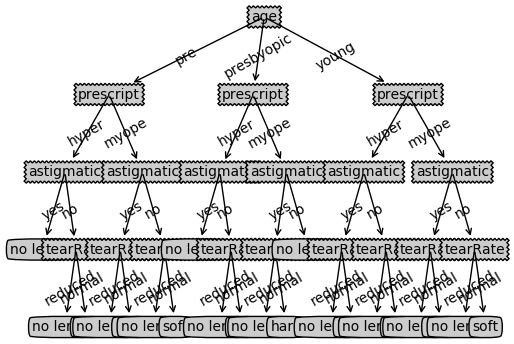

In [39]:
lensesTree=createTree(lenses,lensesFeatures)
createPlot(lensesTree)